# EJERCICIOS

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np


## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [2]:
# Dividimos las tuplas en x e y
(x_train_full, y_train_full), (x_test_full, y_test_full) = tf.keras.datasets.cifar10.load_data()

# primeras para entrenamiento 
x_train = x_train_full[:50000]
y_train = y_train_full[:50000]

# 5000 para validación y 5000 para prueba
x_val = x_test_full[:5000]
y_val = y_test_full[:5000]

x_test = x_test_full[5000:10000]
y_test = y_test_full[5000:10000]

print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de x_test:", x_test.shape)
print("Forma de y_test:", y_test.shape) 

Forma de x_train: (50000, 32, 32, 3)
Forma de y_train: (50000, 1)
Forma de x_val: (5000, 32, 32, 3)
Forma de y_val: (5000, 1)
Forma de x_test: (5000, 32, 32, 3)
Forma de y_test: (5000, 1)


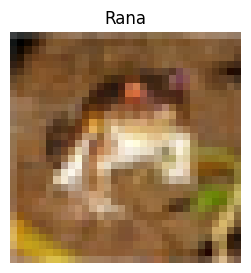

In [3]:
categorias = {
    0: "Avión", 1: "Automóvil", 2: "Pájaro", 
    3: "Gato", 4: "Ciervo", 5: "Perro", 
    6: "Rana", 7: "Caballo", 8: "Barco", 9: "Camión"
}

def display_image(image, label):
    plt.figure(figsize=(4, 3))
    plt.imshow(image)
    plt.title(categorias[label[0]])
    plt.axis('off')
    plt.show()

display_image(x_train[0], y_train[0])


### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [4]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(32,32,3)))

# Flatten
model.add(tf.keras.layers.Flatten())

for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation='swish', kernel_initializer=tf.keras.initializers.he_normal()))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [5]:
learning_rates = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
results = []

for lr in learning_rates:

    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['sparse_categorical_accuracy'])

    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
    end_time = time.time()

    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    total_time = end_time - start_time

    results.append({
        'Red neuronal normal': {
            'Tasa de aprendizaje': lr,
            'Entrenamiento sparse categorical accuracy': train_acc,
            'Validación sparse categorical accuracy': val_acc,
            'Tiempo total (s)': total_time
        }
    })

for result in results:
    print(result)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 5.8851 - sparse_categorical_accuracy: 0.1543 - val_loss: 2.0525 - val_sparse_categorical_accuracy: 0.2426
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 1.9688 - sparse_categorical_accuracy: 0.2794 - val_loss: 1.8994 - val_sparse_categorical_accuracy: 0.3058
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 1.8599 - sparse_categorical_accuracy: 0.3241 - val_loss: 1.8336 - val_sparse_categorical_accuracy: 0.3350
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 1.7901 - sparse_categorical_accuracy: 0.3513 - val_loss: 1.7546 - val_sparse_categorical_accuracy: 0.3674
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 1.7302 - sparse_categorical_accuracy: 0.3754 - val_loss: 1.6815 - val_sparse_categorical_accuracy: 0.4006
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 1.6096 - sparse_categorical_accuracy: 0.4188 - val_loss: 1.5855 - val_sparse_categorical_accuracy:

### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [6]:
best_lr = 1e-8
results.clear
optimizer = tf.keras.optimizers.Nadam(learning_rate=best_lr)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    patience=5,
    restore_best_weights=True 
)

start_time = time.time()
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), 
                    callbacks=[early_stopping_callback], verbose=1)
end_time = time.time()

train_accuracy = model.evaluate(x_train, y_train, verbose=0)[1] 
val_accuracy = model.evaluate(x_val, y_val, verbose=0)[1]
total_time = end_time - start_time

# mejor época
if early_stopping_callback.stopped_epoch == 0:
    best_epoch = 50  # Entrenamiento completó todas las épocas
else:
    best_epoch = early_stopping_callback.stopped_epoch - early_stopping_callback.patience + 1

results.append({
    'Red neuronal normal con detención temprana': {
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

for result in results:
    print(result)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 1.4959 - sparse_categorical_accuracy: 0.4619 - val_loss: 1.5421 - val_sparse_categorical_accuracy: 0.4560
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 1.5096 - sparse_categorical_accuracy: 0.4562 - val_loss: 1.5421 - val_sparse_categorical_accuracy: 0.4560
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 1.5145 - sparse_categorical_accuracy: 0.4554 - val_loss: 1.5421 - val_sparse_categorical_accuracy: 0.4560
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 1.5070 - sparse_categorical_accuracy: 0.4565 - val_loss: 1.5421 - val_sparse_categorical_accuracy: 0.4560
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 1.5049 - sparse_categorical_accuracy: 0.4593 - val_loss: 1.5421 - val_sparse_categorical_accuracy: 0.4560
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 1.5059 - sparse_categorical_accuracy: 0.4581 - val_loss: 1.5421 - val_sparse_categorical_ac

### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [13]:
num_classes = len(categorias)
input_shape = x_train.shape[1:]

def modelo_con_norm(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=input_shape),
        
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Crear modelo con batch normalization
model_batch_norm = modelo_con_norm(input_shape)

learning_rates = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
results_batch_norm = []

for lr in learning_rates:
    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    model_batch_norm.compile(optimizer=optimizer,
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   metrics=['sparse_categorical_accuracy'])
    
    start_time = time.time()
    history = model_batch_norm.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
    end_time = time.time()
    
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    total_time = end_time - start_time
    
    results_batch_norm.append({
        'Red neuronal con batch normalization': {
            'Tasa de aprendizaje': lr,
            'Entrenamiento sparse categorical accuracy': train_acc,
            'Validación sparse categorical accuracy': val_acc,
            'Tiempo total (s)': total_time
        }
    })

# Seleccionar mejor tasa de aprendizaje y añadir early stopping
best_lr = 1e-8  # Ajustar según resultados
optimizer = tf.keras.optimizers.Nadam(learning_rate=best_lr)
model_batch_norm.compile(optimizer=optimizer,
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['sparse_categorical_accuracy'])

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    patience=5,
    restore_best_weights=True
)

start_time = time.time()
history = model_batch_norm.fit(x_train, y_train, epochs=50, 
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping_callback], 
                                verbose=1)
end_time = time.time()

train_accuracy = model_batch_norm.evaluate(x_train, y_train, verbose=0)[1]
val_accuracy = model_batch_norm.evaluate(x_val, y_val, verbose=0)[1]
total_time = end_time - start_time

# Determinar mejor época
if early_stopping_callback.stopped_epoch == 0:
    best_epoch = 50
else:
    best_epoch = early_stopping_callback.stopped_epoch - early_stopping_callback.patience + 1

results_batch_norm.append({
    'Red neuronal con batch normalization y early stopping': {
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_accuracy,
        'Validación sparse categorical accuracy': val_accuracy,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

for result in results_batch_norm:
    print(result)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - loss: 1.9680 - sparse_categorical_accuracy: 0.3293 - val_loss: 1.3177 - val_sparse_categorical_accuracy: 0.5316
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - loss: 1.2799 - sparse_categorical_accuracy: 0.5508 - val_loss: 1.1173 - val_sparse_categorical_accuracy: 0.6082
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - loss: 1.0598 - sparse_categorical_accuracy: 0.6311 - val_loss: 1.0095 - val_sparse_categorical_accuracy: 0.6510
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - loss: 0.9341 - sparse_categorical_accuracy: 0.6753 - val_loss: 0.9408 - val_sparse_categorical_accuracy: 0.6782
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - loss: 0.8549 - sparse_categorical_accuracy: 0.7040 - val_loss: 0.9205 - val_sparse_categorical_accuracy: 0.6874
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - loss: 0.7544 - sparse_categorical_accuracy: 0.7460 - val_loss: 0.8738 - val_sparse_categorical_acc

### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [14]:
# Estandarización 
def estandarizar(X_train, X_val, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train_std = (X_train - mean) / std
    X_val_std = (X_val - mean) / std
    X_test_std = (X_test - mean) / std
    return X_train_std, X_val_std, X_test_std

x_train_std, x_val_std, x_test_std = estandarizar(x_train, x_val, x_test)

def create_selu_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=input_shape),
        
        tf.keras.layers.Conv2D(32, (3, 3), activation='selu', padding='same', 
                                kernel_initializer='lecun_normal'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='selu', padding='same', 
                                kernel_initializer='lecun_normal'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='selu', padding='same', 
                                kernel_initializer='lecun_normal'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='selu', 
                               kernel_initializer='lecun_normal'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

model_selu = create_selu_model(input_shape)

# tasa de aprendizaje
learning_rates = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
results_selu = []

for lr in learning_rates:
    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    model_selu.compile(optimizer=optimizer,
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       metrics=['sparse_categorical_accuracy'])
    
    start_time = time.time()
    history = model_selu.fit(x_train_std, y_train, epochs=5, 
                              validation_data=(x_val_std, y_val))
    end_time = time.time()
    
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    total_time = end_time - start_time
    
    results_selu.append({
        'Red neuronal SELU': {
            'Tasa de aprendizaje': lr,
            'Entrenamiento sparse categorical accuracy': train_acc,
            'Validación sparse categorical accuracy': val_acc,
            'Tiempo total (s)': total_time
        }
    })

# Entrenamiento con early stopping
best_lr = 1e-8
optimizer = tf.keras.optimizers.Nadam(learning_rate=best_lr)
model_selu.compile(optimizer=optimizer,
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   metrics=['sparse_categorical_accuracy'])

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    patience=5,
    restore_best_weights=True
)

start_time = time.time()
history = model_selu.fit(x_train_std, y_train, epochs=50, 
                          validation_data=(x_val_std, y_val),
                          callbacks=[early_stopping_callback], 
                          verbose=1)
end_time = time.time()

train_accuracy = model_selu.evaluate(x_train_std, y_train, verbose=0)[1]
val_accuracy = model_selu.evaluate(x_val_std, y_val, verbose=0)[1]
total_time = end_time - start_time

# Determinar mejor época
if early_stopping_callback.stopped_epoch == 0:
    best_epoch = 50
else:
    best_epoch = early_stopping_callback.stopped_epoch - early_stopping_callback.patience + 1

results_selu.append({
    'Red neuronal SELU con early stopping': {
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_accuracy,
        'Validación sparse categorical accuracy': val_accuracy,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

for result in results_selu:
    print(result)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 2.0379 - sparse_categorical_accuracy: 0.3065 - val_loss: 1.3430 - val_sparse_categorical_accuracy: 0.5408
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 1.4304 - sparse_categorical_accuracy: 0.4940 - val_loss: 1.1657 - val_sparse_categorical_accuracy: 0.5954
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - loss: 1.2602 - sparse_categorical_accuracy: 0.5565 - val_loss: 1.0715 - val_sparse_categorical_accuracy: 0.6264
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - loss: 1.1589 - sparse_categorical_accuracy: 0.5899 - val_loss: 1.0089 - val_sparse_categorical_accuracy: 0.6452
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - loss: 1.0784 - sparse_categorical_accuracy: 0.6238 - val_loss: 0.9798 - val_sparse_categorical_accuracy: 0.6608
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - loss: 1.0027 - sparse_categorical_accuracy: 0.6494 - val_loss: 0.9482 - val_sparse_categorical_acc

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [15]:
# Estandarización 
def estandarizar(X_train, X_val, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train_std = (X_train - mean) / std
    X_val_std = (X_val - mean) / std
    X_test_std = (X_test - mean) / std
    return X_train_std, X_val_std, X_test_std

x_train_std, x_val_std, x_test_std = estandarizar(x_train, x_val, x_test)

def create_selu_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=input_shape),
        
        tf.keras.layers.Conv2D(32, (3, 3), activation='selu', padding='same', 
                                kernel_initializer='lecun_normal'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='selu', padding='same', 
                                kernel_initializer='lecun_normal'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='selu', padding='same', 
                                kernel_initializer='lecun_normal'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='selu', 
                               kernel_initializer='lecun_normal'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

model_selu = create_selu_model(input_shape)

# tasa de aprendizaje
learning_rates = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
results_selu = []

for lr in learning_rates:
    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    model_selu.compile(optimizer=optimizer,
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       metrics=['sparse_categorical_accuracy'])
    
    start_time = time.time()
    history = model_selu.fit(x_train_std, y_train, epochs=5, 
                              validation_data=(x_val_std, y_val))
    end_time = time.time()
    
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    total_time = end_time - start_time
    
    results_selu.append({
        'Red neuronal SELU': {
            'Tasa de aprendizaje': lr,
            'Entrenamiento sparse categorical accuracy': train_acc,
            'Validación sparse categorical accuracy': val_acc,
            'Tiempo total (s)': total_time
        }
    })

# Entrenamiento con early stopping
best_lr = 1e-8
optimizer = tf.keras.optimizers.Nadam(learning_rate=best_lr)
model_selu.compile(optimizer=optimizer,
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   metrics=['sparse_categorical_accuracy'])

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    patience=5,
    restore_best_weights=True
)

start_time = time.time()
history = model_selu.fit(x_train_std, y_train, epochs=50, 
                          validation_data=(x_val_std, y_val),
                          callbacks=[early_stopping_callback], 
                          verbose=1)
end_time = time.time()

train_accuracy = model_selu.evaluate(x_train_std, y_train, verbose=0)[1]
val_accuracy = model_selu.evaluate(x_val_std, y_val, verbose=0)[1]
total_time = end_time - start_time

# Determinar mejor época
if early_stopping_callback.stopped_epoch == 0:
    best_epoch = 50
else:
    best_epoch = early_stopping_callback.stopped_epoch - early_stopping_callback.patience + 1

results_selu.append({
    'Red neuronal SELU con early stopping': {
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_accuracy,
        'Validación sparse categorical accuracy': val_accuracy,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

for result in results_selu:
    print(result)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 2.0284 - sparse_categorical_accuracy: 0.3102 - val_loss: 1.3076 - val_sparse_categorical_accuracy: 0.5460
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 1.4075 - sparse_categorical_accuracy: 0.5029 - val_loss: 1.1379 - val_sparse_categorical_accuracy: 0.6086
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 1.2324 - sparse_categorical_accuracy: 0.5680 - val_loss: 1.0659 - val_sparse_categorical_accuracy: 0.6334
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 1.1437 - sparse_categorical_accuracy: 0.6045 - val_loss: 1.0179 - val_sparse_categorical_accuracy: 0.6506
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 1.0696 - sparse_categorical_accuracy: 0.6259 - val_loss: 0.9667 - val_sparse_categorical_accuracy: 0.6680
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - loss: 0.9991 - sparse_categorical_accuracy: 0.6523 - val_loss: 0.9358 - val_sparse_categorical_acc